In [2]:
# Exercise 1:
import numpy as np


In [19]:
########## 1 ####
x = np.random.randint(1,11,size=(5,5));
x_23 =np.copy(x[1,2]);
x_diag=np.diagonal(x);
x_resh=np.reshape(x,(1,25));
#################

########## 2 ###
A = np.asmatrix(np.random.randint(1,11,size=(3,3)));
B = np.asmatrix(np.random.randint(1,11,size=(3,3)));
C = A*B; #matrix-multiplication.
#############

In [22]:
###################
y = np.random.randint(1,101,size=20);
meanY = np.mean(y);
stdDevY = np.std(y);
varY = stdDevY*stdDevY;
####################

In [66]:
###########
from scipy.sparse import lil_matrix
from  scipy.sparse.linalg import spsolve
spA= lil_matrix((100,100), dtype=float);
spA.setdiag(2.0,0);
spA.setdiag(-1.0,1);
spA.setdiag(-1.0,-1);
xex = np.ones((100,1));
bex=spA@xex;

xc = spsolve(spA,bex);

def Residual(xex,b,A):
    xc = spsolve(spA,b);
    residual_1 = np.linalg.norm(xex-xc.T,ord=1);
    residual_2 = np.linalg.norm(xex-xc.T,ord=2);
    return residual_1, residual_2;

r1, r2 =  Residual(xex,bex,spA);

In [74]:
## EX OPTIMIZATION ###
from scipy.optimize import minimize

import matplotlib.pyplot as plt
def f(x):
    f=np.sin(np.pi*x)*np.exp(-x/10);
    return f


Local minima found:    message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.0518037215167986
        x: [-5.101e-01]
      nit: 4
      jac: [-1.490e-08]
 hess_inv: [[ 9.626e-02]]
     nfev: 12
     njev: 6


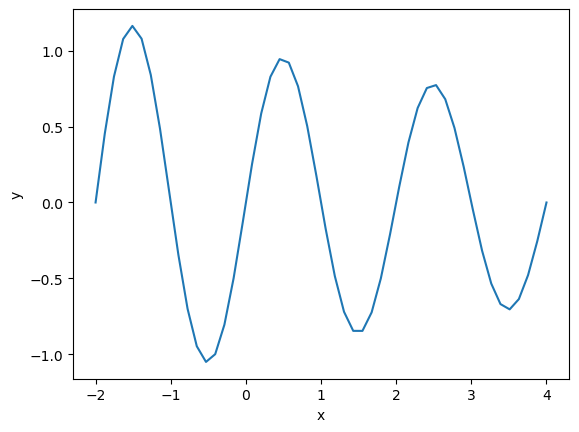

In [77]:
X = np.linspace(-2,4);

plt.plot(X,f(X),label = 'function');
plt.xlabel("x");
plt.ylabel("y");


loc_minima_1 = minimize(f,x0=-1.0);
print("Local minima found: ", loc_minima_1)

<Axes: xlabel='Product'>

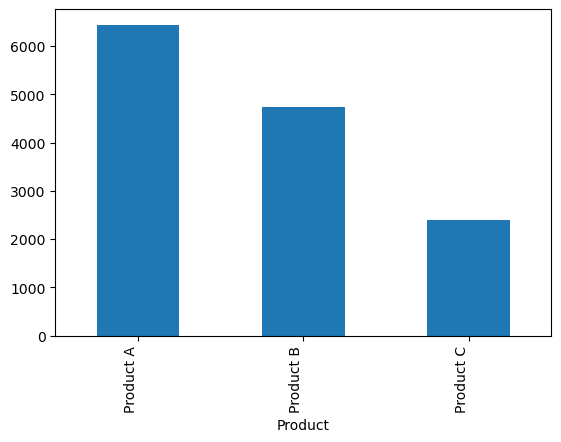

In [81]:
# Exercise 3 
import pandas as pd
import numpy as np

data_sales = pd.read_csv("sales_data.csv");

#RegionName = "South";
#iSsouth = (data_sales["region"]==RegionName)
data_sales.Quantity = data_sales.Quantity.astype(int)
dataSouth = data_sales[data_sales['Region'].str.contains('South')];

dataSouth_sorted = dataSouth.sort_values(by='Quantity');
#x= dataSouth["Quantity"]*dataSouth["Price"];
dataSouth_sorted
dataSouth_sorted["Total"] = dataSouth_sorted["Quantity"]*dataSouth_sorted["Price"];

dataSouth_sorted['Total_SUM'] = dataSouth_sorted.groupby('Product')['Total'].transform('sum')

import matplotlib.pyplot as plt

dataSouth_sorted["Date"]=pd.to_datetime(dataSouth_sorted["Date"]);

dataSouth_sorted.groupby("Date")["Total"].sum().plot(kind="line")
dataSouth_sorted.groupby("Product")["Total"].sum().plot(kind="bar")

/home/nicopc/anaconda3/envs/POLITO_ENV/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicopc/anaconda3/envs/POLITO_ENV/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicopc/anaconda3/envs/POLITO_ENV/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicopc/anaconda3/envs/POLITO_ENV/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

<Axes: xlabel='sepal_length', ylabel='Count'>

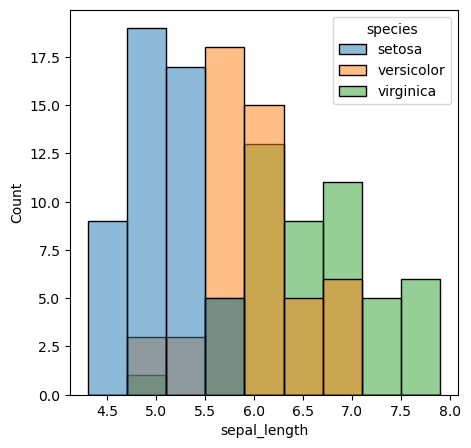

In [86]:
import seaborn as sns

fig,ax = plt.subplots(figsize=(5,5));
Iris = pd.read_csv("iris.csv");
Iris_grouped = Iris.groupby("species");
#Iris_grouped.plot.hist(x="sepal_length")
sns.histplot(data=Iris,x="sepal_length",hue="species")

In [77]:
# Last Exercise wheater_data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wheater_data = pd.read_csv("weather_data.csv");
wheater_data['Date'] = pd.to_datetime(wheater_data['Date'], dayfirst=False);
wheater_data['month']= wheater_data['Date'].dt.month

In [78]:
days_=[];
monthly_average =[];

list_name=["jan","feb","march","april","may","june","jul","Aug","Sept","Oct","Nov","Dec"];

for i,monthname in enumerate(list_name):
    days_.append(wheater_data['month'] == i+1);
    wheater_data[monthname] = ((wheater_data['month'] == int(i+1)));
    
    
monthly_average =[];
for month_ in list_name:
    monthly_average.append(np.mean(wheater_data["Temperature"][wheater_data[month_]]));

mean_7 = wheater_data['Temperature'].rolling(7).mean();
mean_7.dropna(inplace=True);

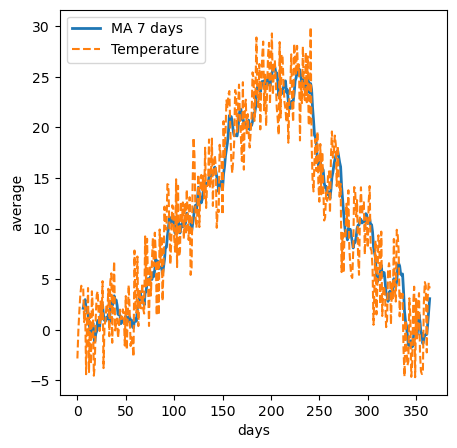

In [94]:
fig,ax = plt.subplots(figsize=(5,5));
ax.plot(wheater_data['Temperature'].rolling(7).mean(),label= 'MA 7 days',linewidth=2)
ax.plot(wheater_data['Temperature'],linestyle='--',label= 'Temperature')
ax.set_xlabel('days');
ax.set_ylabel('average');
ax.legend()